In [1]:
from collections import defaultdict
import statistics

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
years_df = pd.read_csv("https://raw.githubusercontent.com/avgupta456/statbotics-csvs/main/years.csv")

In [3]:
team_years_df = pd.read_csv("https://raw.githubusercontent.com/avgupta456/statbotics-csvs/main/team_years.csv")

In [4]:
events_df = pd.read_csv("https://raw.githubusercontent.com/avgupta456/statbotics-csvs/main/events.csv")

In [5]:
matches_df = pd.read_csv("https://raw.githubusercontent.com/avgupta456/statbotics-csvs/main/matches.csv")

In [6]:
year_matches_dict = {k: v for k, v in matches_df.groupby(["year"])}
year_teams_dict = {k: v for k, v in team_years_df.groupby(["year"])}

event_to_week = {v.key: v.week for _, v in events_df.iterrows()}

# ranking points
# 2016 - auto, endgame (worth 20, 25 points in elims)
# 2017 - teleop, teleop (worth 20, 100 points in elims)
# 2018 - auto, endgame (worthless in elims)
# 2019 - teleop, endgame (worthless in elims)
# 2020 - teleop, endgame (worthless in elims)
# 2022 - teleop, endgame (worthless in elims)

In [7]:
def get_stats(year):
    event_weeks = {}
    autos, teleops, endgames, scores = {}, {}, {}, {}
    
    for _, event in events_df[(events_df.year == year)].iterrows():
        event_weeks[event.key] = event.week
        
    for week in set(event_weeks.values()):
        autos[week] = []
        teleops[week] = []
        endgames[week] = []
        scores[week] = []

    for _, match in matches_df[(matches_df.year == year) & (matches_df.playoff == False)].iterrows():
        week = event_weeks[match.event]
        if match.red_auto >= 0 and match.blue_auto >= 0:
            autos[week].extend([match.red_auto, match.blue_auto])
        if match.red_teleop >= 0 and match.blue_teleop >= 0:
            teleops[week].extend([match.red_score - match.red_auto - match.red_endgame, match.blue_score - match.blue_auto - match.red_auto])
        if match.red_endgame >= 0 and match.blue_endgame >= 0:
            endgames[week].extend([match.red_endgame, match.blue_endgame])
        if match.red_score >= 0 and match.blue_score >= 0:
            scores[week].extend([match.red_score, match.blue_score])

    out = {}
    for week in set(event_weeks.values()):
        autos[week] = [x for x in autos[week] if x >= 0]
        teleops[week] = [x for x in teleops[week] if x >= 0]
        endgames[week] = [x for x in endgames[week] if x >= 0]
        scores[week] = [x for x in scores[week] if x >= 0]

        auto_mean, auto_sd = sum(autos[week]) / len(autos[week]), statistics.pstdev(autos[week])
        teleop_mean, teleop_sd = sum(teleops[week]) / len(teleops[week]), statistics.pstdev(teleops[week])
        endgame_mean, endgame_sd = sum(endgames[week]) / len(endgames[week]), statistics.pstdev(endgames[week])
        score_mean, score_sd = sum(scores[week]) / len(scores[week]), statistics.pstdev(scores[week])

        out[week] = auto_mean, auto_sd, teleop_mean, teleop_sd, endgame_mean, endgame_sd, score_mean, score_sd

    return out

year_stats = {year: get_stats(year) for year in range(2016, 2021)}

for year in year_stats:
    auto_mean, auto_sd, teleop_mean, teleop_sd, endgame_mean, endgame_sd, score_mean, score_sd = year_stats[year][1]
    print(
        year, "\t", 
        "{:3.2f}".format(auto_mean), "  \t", 
        "{:3.2f}".format(auto_sd), "  \t", 
        "{:3.2f}".format(teleop_mean), "  \t", 
        "{:3.2f}".format(teleop_sd), "  \t", 
        "{:3.2f}".format(endgame_mean), "  \t", 
        "{:3.2f}".format(endgame_sd), "  \t", 
        "{:3.2f}".format(score_mean), "  \t",
        "{:3.2f}".format(score_sd),
    )

2016 	 14.61   	 8.31   	 36.58   	 16.24   	 7.77   	 4.89   	 61.63   	 20.66
2017 	 27.76   	 27.35   	 97.46   	 49.23   	 53.90   	 44.31   	 164.47   	 64.22
2018 	 19.99   	 11.04   	 207.67   	 96.43   	 39.62   	 22.24   	 256.61   	 107.08
2019 	 10.50   	 3.70   	 21.44   	 12.14   	 9.81   	 5.43   	 41.30   	 15.61
2020 	 25.86   	 12.49   	 35.02   	 26.73   	 31.91   	 21.69   	 85.60   	 40.92


In [8]:
for year in range(2016, 2021):
    
    weeks = []
    autos = []
    teleops = []
    endgames = []
    scores = []
    
    print(year)
    for week in range(1, 9):
        if week in year_stats[year]:
            weeks.append(week)
            autos.append(year_stats[year][week][0])
            teleops.append(year_stats[year][week][2])
            endgames.append(year_stats[year][week][4])
            scores.append(year_stats[year][week][6])
            
            print(week, "\t", "\t".join([str(round(x, 2)) for x in year_stats[year][week]]))
    """
    fig, ax = plt.subplots()
    ax.plot(weeks, autos, label="Auto")
    ax.plot(weeks, teleops, label="Teleop")
    ax.plot(weeks, endgames, label="Endgame")
    ax.plot(weeks, scores, label="Score")
    ax.legend()
    fig.show()
    """

2016
1 	 14.61	8.31	36.58	16.24	7.77	4.89	61.63	20.66
2 	 15.94	8.65	37.22	16.97	8.36	4.9	64.63	22.18
3 	 17.77	8.34	39.92	17.32	9.12	4.67	70.47	21.68
4 	 20.32	8.35	43.14	18.92	9.53	4.68	77.59	22.78
5 	 20.95	8.64	44.89	19.57	9.72	4.53	80.62	23.38
6 	 22.0	8.53	44.69	19.07	9.92	4.52	81.88	23.42
7 	 28.33	7.95	61.95	22.61	10.9	3.82	110.01	23.13
8 	 28.87	8.65	60.96	23.69	10.36	4.09	109.25	24.77
2017
1 	 27.76	27.35	97.46	49.23	53.9	44.31	164.47	64.22
2 	 33.0	29.43	101.32	51.81	60.35	45.84	178.63	66.66
3 	 38.48	30.52	108.42	53.6	72.84	45.31	200.84	67.02
4 	 42.51	30.88	113.78	55.53	83.93	45.49	218.86	67.28
5 	 46.91	31.24	118.39	54.64	87.33	44.72	230.97	66.02
6 	 50.96	31.05	125.14	54.53	97.9	45.33	249.03	68.59
7 	 65.78	26.52	137.53	49.83	119.66	36.26	296.01	52.04
8 	 62.84	29.2	144.04	55.98	117.78	37.4	296.13	57.36
2018
1 	 19.99	11.04	207.67	96.43	39.62	22.24	256.61	107.08
2 	 20.47	11.19	213.87	98.57	38.61	22.46	262.87	109.26
3 	 21.93	10.94	218.48	97.81	42.24	22.3	271.24	108.69
4

In [17]:
global_factor = 0.40
defense_percent = 0.30
sensitivity = 0.50
nonlinearity = 0.95

auto_elos = defaultdict(dict)
teleop_elos = defaultdict(dict)
endgame_elos = defaultdict(dict)
all_elos = defaultdict(dict)

for year in range(2014, 2016):
    for _, team_year in year_teams_dict[year].iterrows():
        team_num = team_year.team
        all_elos[year][team_num] = [130 + (team_year.elo_end - 1500) / 250 * 100]
        auto_elos[year][team_num] = all_elos[year][team_num]
        
def nl(x):
    if x == 0:
        return 0
    return abs(x) / x * 50 * abs(x / 50) ** nonlinearity

def get_stats(year):
    auto_mean, _, teleop_mean, _, endgame_mean, _, score_mean, _ = year_stats[year][1]
    auto_sd, teleop_sd, endgame_sd, score_sd = auto_mean / 3, teleop_mean / 3, endgame_mean / 3, score_mean / 3
    return auto_mean, auto_sd, teleop_mean, teleop_sd, endgame_mean, endgame_sd, score_mean, score_sd

def score_pred_func(match, diff):
    red_win_prob = 1 / (10 ** (-diff / 100 * sensitivity) + 1)
    # red_win_prob = (red_win_prob + 0.5 * match.elo_win_prob) / 1.5
    
    red_score, blue_score = match.red_score, match.blue_score
    winner = 1 if red_score > blue_score else (0 if red_score < blue_score else 0.5)
    ll = -(winner * np.log(red_win_prob) + (1 - winner) * np.log(1 - red_win_prob))
    
    if red_score > blue_score:
        return red_win_prob >= 0.5, (1 - red_win_prob) ** 2, ll
    elif red_score < blue_score:
        return red_win_prob <= 0.5, (red_win_prob) ** 2, ll
    
    return 0, (0.5 - red_win_prob) ** 2, ll

def elo_sum(x):
    x = list(x)
    return sum(x) + global_factor * max(x)  - global_factor * min(x)

def update_elo(elo, update, elos):
    mult = 1
    if elo == max(elos):
        mult += global_factor
    elif elo == min(elos):
        mult -= global_factor
    return round(max(0, elo + mult * update), 2)

stats = defaultdict(lambda: defaultdict(lambda: [0, 0, 0, 0]))
event_stats = defaultdict(lambda: [0, 0, 0, 0])
for year in range(2016, 2021):
    years_row = years_df[years_df.year == year].iloc[0]
    year_matches_df = year_matches_dict[year].sort_values(by=["time"])
    year_teams_df = year_teams_dict[year]
    
    
    auto_mean, auto_sd, teleop_mean, teleop_sd, endgame_mean, endgame_sd, score_mean, score_sd = get_stats(year)
    defense_percent = 0.8 if year == 2018 else defense_percent
    
    for _, team_year in year_teams_df.iterrows():
        team_num = team_year.team
        
        for (elo_dict, source_elo_dict) in [(auto_elos, auto_elos), (teleop_elos, all_elos), (endgame_elos, all_elos)]:
            elo_1yr = source_elo_dict[year - 1].get(team_num, [80])[-1] - 100
            elo_2yr = source_elo_dict[year - 2].get(team_num, [80])[-1] - 100
            elo_dict[year][team_num] = [0.7 * nl(0.8 * elo_1yr + 0.2 * elo_2yr) + 70]
    
    for _, match in year_matches_df.iterrows():
        if not (match.red_auto >= 0 and match.red_teleop >= 0 and match.red_endgame >= 0 and match.red_score >= 0):
            continue
            
        week = event_to_week[match.event]
    
        red_teams = [int(x) for x in match.red.split(",")]
        blue_teams = [int(x) for x in match.blue.split(",")]
        
        red_auto = elo_sum([auto_elos[year][x][-1] for x in red_teams])
        blue_auto = elo_sum([auto_elos[year][x][-1] for x in blue_teams])
        auto_diff = nl(red_auto) - nl(blue_auto)
        
        red_endgame = elo_sum([endgame_elos[year][x][-1] for x in red_teams])
        blue_endgame = elo_sum([endgame_elos[year][x][-1] for x in blue_teams])
        endgame_diff = nl(red_endgame) - nl(blue_endgame)
        
        red_teleop = elo_sum([teleop_elos[year][x][-1] for x in red_teams])
        blue_teleop = elo_sum([teleop_elos[year][x][-1] for x in blue_teams])
        teleop_diff = nl(red_teleop - blue_teleop)
        
        elo_diff = (auto_sd * auto_diff + teleop_sd * teleop_diff + endgame_sd * endgame_diff) / score_sd
        _acc, _mse, _ll = score_pred_func(match, elo_diff)
        
        if match.event == "2019carv":
            win_prob = 1 / (10 ** (-elo_diff / 100 * sensitivity) + 1)
            if not _acc and ((match.red_score > match.blue_score and win_prob + 0.1 < match.elo_win_prob) or (match.red_score < match.blue_score and win_prob - 0.1 > match.elo_win_prob)):
                print(match.key)
                print(red_teams, blue_teams)
                print(auto_diff, teleop_diff, endgame_diff, elo_diff)
                print(match.elo_win_prob, "->", win_prob)
                print(_acc, _mse, _ll)
                print()
        
        stats[year][week][0] += _acc
        stats[year][week][1] += _mse
        stats[year][week][2] += _ll
        stats[year][week][3] += 1
        
        event_stats[match.event][0] += _acc
        event_stats[match.event][1] += _mse
        event_stats[match.event][2] += _ll
        event_stats[match.event][3] += 1
            
        k = 3 if match.playoff else 8
        
        # creates new entry at [-1], [-2] shows prior measurements
        for arr in [auto_elos, teleop_elos, endgame_elos]:
            for team in red_teams + blue_teams:
                arr[year][team].append(1 + arr[year][team][-1])
        
        for (sd, elo_dict, teams, get_func, weight) in [
            (auto_sd, auto_elos, red_teams, lambda m: m.red_auto, 1),
            (auto_sd, auto_elos, blue_teams, lambda m: m.blue_auto, 1),
            (endgame_sd, endgame_elos, red_teams, lambda m: m.red_endgame, 1),
            (endgame_sd, endgame_elos, blue_teams, lambda m: m.blue_endgame, 1),
            (teleop_sd, teleop_elos, red_teams, lambda m: m.red_score - m.red_auto - m.red_endgame, 1 - defense_percent),
            (teleop_sd, teleop_elos, blue_teams, lambda m: m.blue_score - m.blue_auto - m.blue_endgame, 1 - defense_percent),
        ]:
            temp_elos = [elo_dict[year][x][-2] for x in teams]
            score_pred = nl(elo_sum(temp_elos)) / 100
            score = get_func(match) / sd
            for x, temp_elo in zip(teams, temp_elos):
                elo_dict[year][x][-1] = update_elo(elo_dict[year][x][-1], k * weight * (score - score_pred), temp_elos)
        
        for (sd, elo_dict, red_get_func, blue_get_func, weight) in [
            (teleop_sd, teleop_elos, lambda m: m.red_score - m.red_auto - m.red_endgame, lambda m: m.blue_score - m.blue_auto - m.blue_endgame, defense_percent),
        ]:
            red_elos = [elo_dict[year][x][-2] for x in red_teams]
            blue_elos = [elo_dict[year][x][-2] for x in blue_teams]
            pred_win_margin = nl(elo_sum(red_elos) - elo_sum(blue_elos)) / 100
            win_margin = (red_get_func(match) - blue_get_func(match)) / sd
            for x, temp_elo in zip(red_teams, red_elos):
                elo_dict[year][x][-1] = update_elo(elo_dict[year][x][-1], k * weight * (win_margin - pred_win_margin), red_elos)
            for x, temp_elo in zip(blue_teams, blue_elos):
                elo_dict[year][x][-1] = update_elo(elo_dict[year][x][-1], -k * weight * (win_margin - pred_win_margin), blue_elos)
    
    all_elos[year] = {
        k: [
            round(
            (auto_sd * auto_elos[year][k][i] + teleop_sd * teleop_elos[year][k][i] + endgame_sd * endgame_elos[year][k][i]) / 
            (auto_sd + teleop_sd + endgame_sd), 2)
            for i in range(len(auto_elos[year][k]))
        ]for k in auto_elos[year].keys()
    }
    
    total_acc, total_mse, total_ll, total_count = 0, 0, 0, 0
    for week in stats[year]:
        acc, mse, ll, count = stats[year][week]
        total_acc, total_mse, total_ll, total_count = total_acc + acc, total_mse + mse, total_ll + ll, total_count + count
        print(year, week, "\t", count, "\t", "{:.4f}".format(round(acc / count, 4)), "\t", "{:.4f}".format(round(mse / count, 4)), "\t", "{:.4f}".format(round(ll / count, 4)))
    print(year, "\t", total_count, "\t", "{:.4f}".format(round(total_acc / total_count, 4)), "\t", "{:.4f}".format(round(total_mse / total_count, 4)), "\t", "{:.4f}".format(round(total_ll / total_count, 4)))
    print()
    
total_acc = sum(sum([x[0] for x in stats[year].values()]) for year in stats)
total_mse = sum(sum([x[1] for x in stats[year].values()]) for year in stats)
total_ll = sum(sum([x[2] for x in stats[year].values()]) for year in stats)
total_count = sum(sum([x[3] for x in stats[year].values()]) for year in stats)
print("Avg", "\t", total_count, "\t", "{:.4f}".format(round(total_acc / total_count, 4)), "\t", "{:.4f}".format(round(total_mse / total_count, 4)), "\t", "{:.4f}".format(round(total_ll / total_count, 4)))

2016 0 	 102 	 0.7353 	 0.1788 	 0.5392
2016 1 	 1589 	 0.6904 	 0.1976 	 0.5871
2016 2 	 2325 	 0.7127 	 0.1837 	 0.5570
2016 3 	 1742 	 0.7245 	 0.1763 	 0.5372
2016 4 	 1914 	 0.7461 	 0.1668 	 0.5131
2016 5 	 2256 	 0.7292 	 0.1710 	 0.5162
2016 6 	 1519 	 0.7143 	 0.1757 	 0.5333
2016 7 	 695 	 0.7122 	 0.1809 	 0.5451
2016 8 	 1144 	 0.7456 	 0.1682 	 0.5148
2016 	 13286 	 0.7223 	 0.1774 	 0.5376

2017 1 	 1906 	 0.6453 	 0.2109 	 0.6231
2017 2 	 2462 	 0.6653 	 0.2020 	 0.5985
2017 3 	 2184 	 0.6630 	 0.1949 	 0.5846
2017 4 	 2672 	 0.6890 	 0.1919 	 0.5757
2017 5 	 2023 	 0.6747 	 0.2002 	 0.5901
2017 6 	 1970 	 0.6645 	 0.2051 	 0.6023
2017 7 	 621 	 0.6071 	 0.2245 	 0.6494
2017 8 	 1591 	 0.6612 	 0.2091 	 0.6129
2017 	 15429 	 0.6650 	 0.2021 	 0.5986

2018 1 	 1897 	 0.7190 	 0.1820 	 0.5398
2018 2 	 2621 	 0.7249 	 0.1798 	 0.5358
2018 3 	 2576 	 0.7558 	 0.1604 	 0.4865
2018 4 	 2711 	 0.7617 	 0.1603 	 0.4839
2018 5 	 2314 	 0.7584 	 0.1620 	 0.4894
2018 6 	 2215 	 0.7

<IPython.core.display.Javascript object>


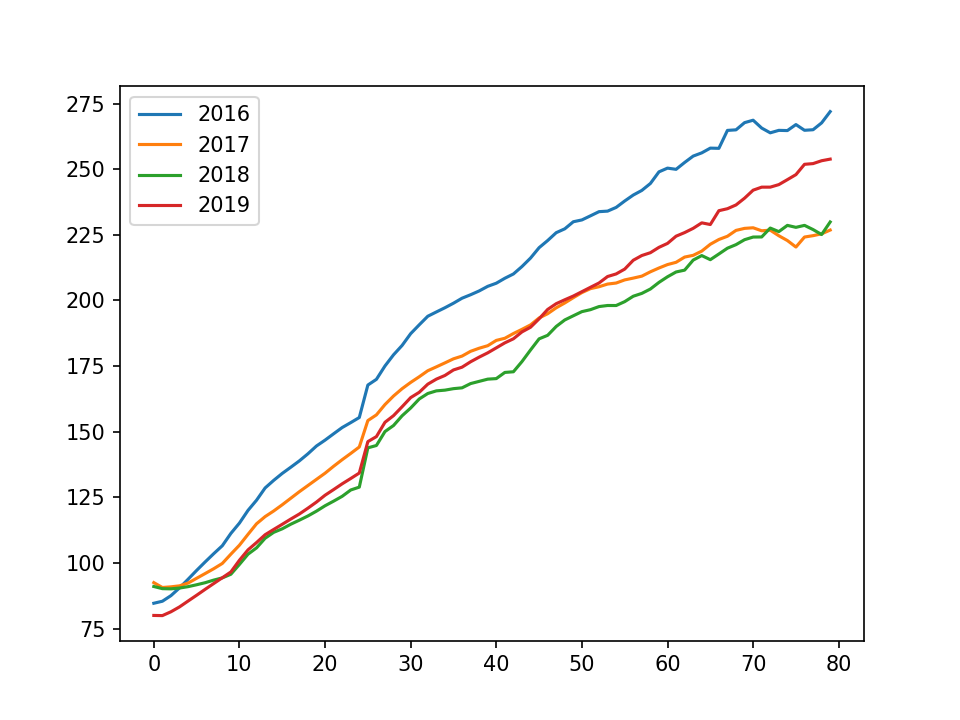

115.23986817325805
106.81822741326019
99.50001527650501
101.09544787077813


In [10]:
fig, ax = plt.subplots()

for year in range(2016, 2020):
    elo_trend = []
    for team in range(1, 10000):
        if team in all_elos[year]:
            for i, elo in enumerate(all_elos[year][team]):
                if len(elo_trend) == i:
                    elo_trend.append([])
                elo_trend[i].append(all_elos[year][team][i])

    elo_trend_actual = []
    for data in elo_trend[:80]:
        elo_trend_actual.append(sum(data) / len(data))
        
    print(elo_trend_actual[10])
    ax.plot(range(len(elo_trend_actual)), elo_trend_actual, label=year)
    
ax.legend()
fig.show()

<IPython.core.display.Javascript object>


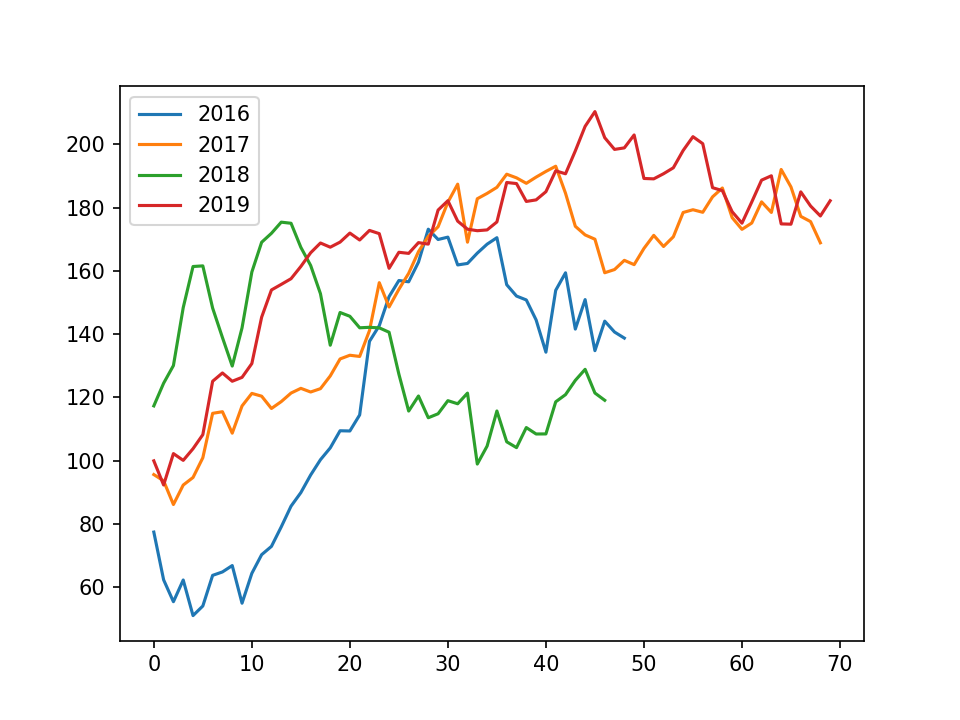

In [19]:
team = 5511

fig, ax = plt.subplots()
for year in range(2016, 2020):
    if team in all_elos[year]:
        plt.plot(range(len(all_elos[year][team])), all_elos[year][team], label=year)
ax.legend()
fig.show()

In [12]:
champs_2018 = ["2018carv", "2018gal", "2018hop", "2018new", "2018roe", "2018tur"]
champs_2019 = ["2019carv", "2019gal", "2019hop", "2019new", "2019roe"]  # excludes Turing

acc, mse, ll, count = 0, 0, 0, 0
for event in champs_2019:
    _acc, _mse, _ll, _count = event_stats[event]
    acc, mse, ll, count = acc + _acc, mse + _mse, ll + _ll, count + _count
print(acc / count, mse / count, ll / count)

0.7198142414860681 0.1745762551852379 0.5229225079867119


In [13]:
# 2018
# carver - 0.7632, 0.1521, 0.4706 (0.159, 0.165, 0.170) -> winner
# galileo - 0.7719, 0.1609, 0.4885 (0.173, 0.174, 0.174) -> winner
# hopper - 0.7281, 0.1679, 0.3996 (0.158, 0.164, 0.166) -> 4th
# newton - 0.8304, 0.1278, 0.4061 (0.125, 0.125, 0.127) -> 4th
# roebling - 0.6607, 0.1911, 0.5618 (0.202, 0.205, 0.206) -> winner
# turing - 0.8035, 0.1391, 0.4373 (0.155, 0.156, 0.157) -> winner

#2019
# 0.7198, 0.1685, 0.5091 (0.1646, 0.1655, 0.1665) -> 4th
# -> update teleop separately
# 0.7198, 0.1662, 0.5041 (0.1646, 0.1655, 0.1665) -> 3rd

# seemed to do quite poorly on 2019 champs
# also note this uses match data to fine tune results, see if you can extract before event for apples to apples

# TODO:
# - calibration curve
# - incorporate RP
# - misc testing
# - investigate ML?

In [14]:
for year in range(2016, 2021):
    new_data = list(sorted([(x[0], x[1][-1]) for x in all_elos[year].items()], key=lambda x: -x[1]))
    old_data = sorted([(t.team, t.elo_end) for _, t in year_teams_dict[year].iterrows()], key=lambda x: -x[1])
    
    print(year)
    for i in range(10):
        print(i + 1, "\t", new_data[i][0], new_data[i][1], "\t", old_data[i][0], old_data[i][1])
    print("Avg\t", round(sum([x[1] for x in new_data]) / len(new_data), 2), "\t", round(sum([x[1] for x in old_data]) / len(old_data), 2))
    print()

2016
1 	 2056 455.58 	 1678 1955.0
2 	 1678 435.58 	 254 1948.0
3 	 195 430.63 	 971 1943.0
4 	 148 418.39 	 2056 1939.0
5 	 330 417.82 	 118 1937.0
6 	 1690 404.43 	 148 1921.0
7 	 2481 403.17 	 195 1917.0
8 	 971 401.56 	 330 1887.0
9 	 254 390.64 	 1241 1887.0
10 	 1501 389.92 	 225 1876.0
Avg	 141.07 	 1498.75

2017
1 	 1986 354.43 	 254 1879.0
2 	 254 345.74 	 1986 1868.0
3 	 1678 325.54 	 2056 1821.0
4 	 2056 324.24 	 1678 1815.0
5 	 973 318.81 	 195 1801.0
6 	 118 314.66 	 118 1798.0
7 	 3310 309.29 	 987 1788.0
8 	 1114 309.04 	 3310 1786.0
9 	 195 308.52 	 2481 1783.0
10 	 987 307.72 	 33 1779.0
Avg	 133.48 	 1499.83

2018
1 	 254 342.4 	 254 2032.0
2 	 2056 318.43 	 2056 2028.0
3 	 1678 315.19 	 1678 1990.0
4 	 2046 304.59 	 2046 1962.0
5 	 3309 297.26 	 694 1951.0
6 	 118 295.47 	 2910 1940.0
7 	 1323 291.64 	 1323 1939.0
8 	 2767 290.86 	 2590 1934.0
9 	 2910 290.32 	 1114 1933.0
10 	 4539 285.6 	 195 1932.0
Avg	 105.95 	 1502.88

2019
1 	 1323 355.51 	 2056 1940.0
2 	 3538

2016
[155.07, 174.12, 131.12, 147.99, 325.28, 268.08, 176.55, 295.23, 316.46, 140.39]
[1548.0, 1503.0, 1509.0, 1553.0, 1786.0, 1683.0, 1594.0, 1746.0, 1737.0, 1530.0]

141.06757546563878
152.26131021194635
140.09222864482993
124.60482016698766
1498.7495183044316


<IPython.core.display.Javascript object>


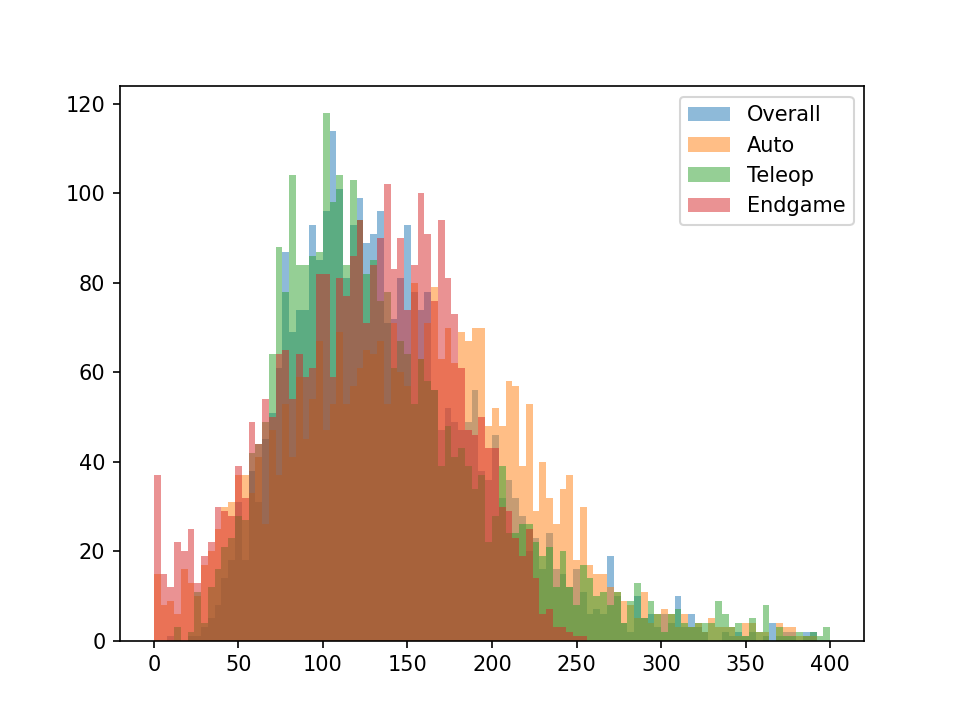

2017
[144.79, 155.68, 202.66, 189.86, 240.62, 200.79, 154.91, 211.72, 222.29, 129.98]
[1505.0, 1500.0, 1513.0, 1635.0, 1727.0, 1592.0, 1526.0, 1711.0, 1630.0, 1503.0]

133.48400180126117
173.9794536175323
104.1514950465326
165.66469228459957
1499.8348844190934


<IPython.core.display.Javascript object>


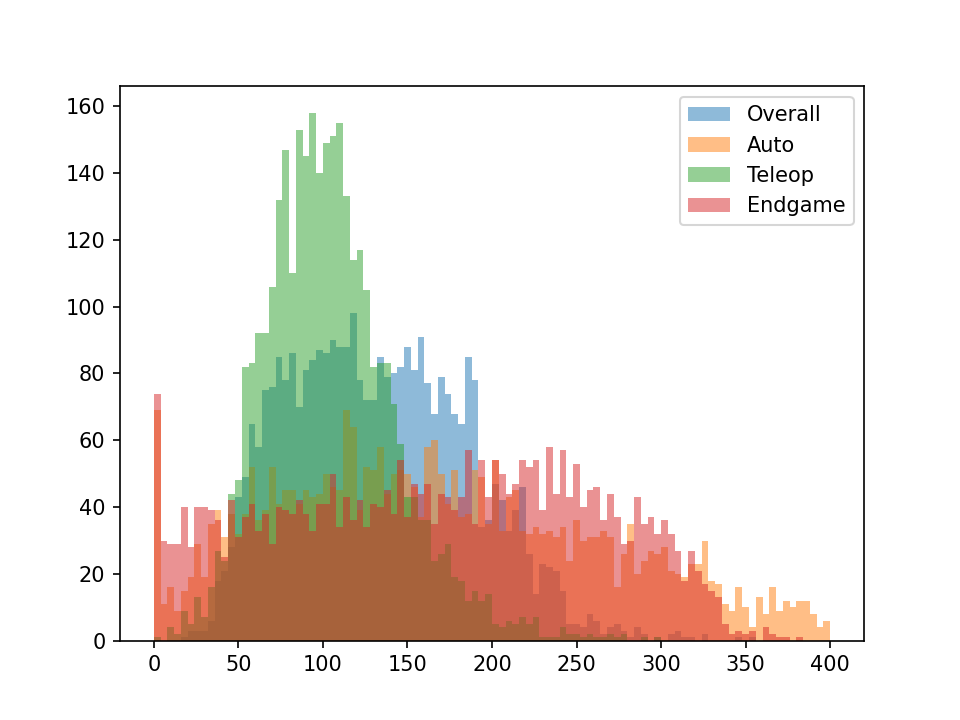

2018
[160.32, 171.67, 181.02, 115.67, 262.28, 216.31, 169.12, 160.5, 238.18, 265.67]
[1625.0, 1572.0, 1621.0, 1552.0, 1828.0, 1720.0, 1598.0, 1615.0, 1848.0, 1892.0]

105.94557367984523
125.89579485761648
101.73250760298589
117.96061100359393
1502.882222836605


<IPython.core.display.Javascript object>


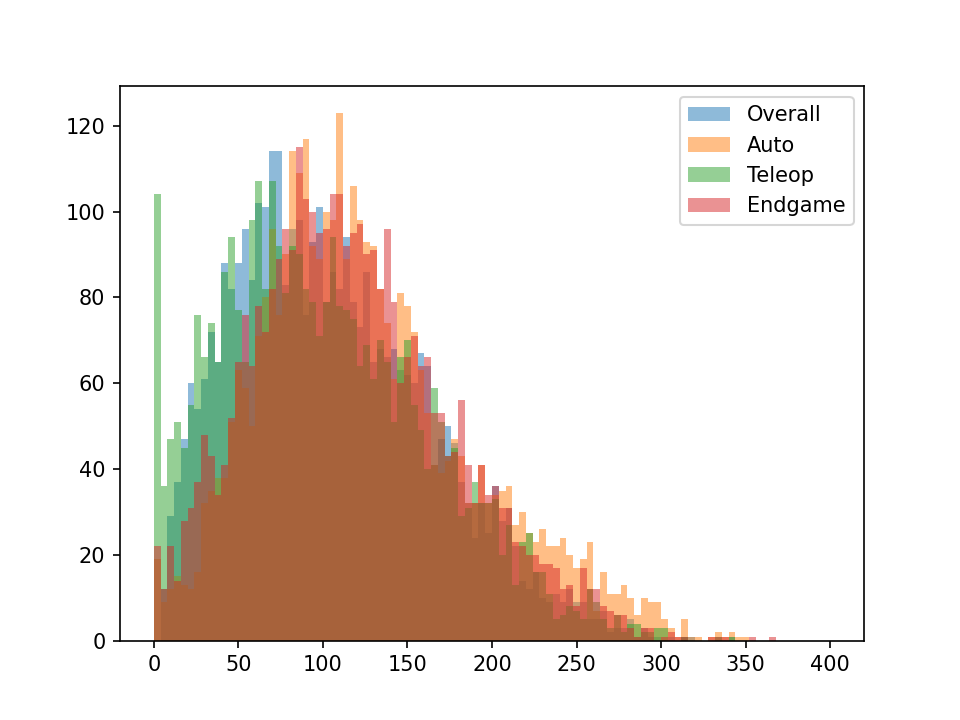

2019
[152.13, 153.9, 183.75, 171.02, 223.29, 275.67, 128.85, 149.98, 184.74, 253.75]
[1557.0, 1551.0, 1568.0, 1596.0, 1723.0, 1805.0, 1543.0, 1574.0, 1652.0, 1732.0]

124.84801063829815
126.42156117021277
124.58252393617039
123.74382446808511
1511.7077127659575


<IPython.core.display.Javascript object>


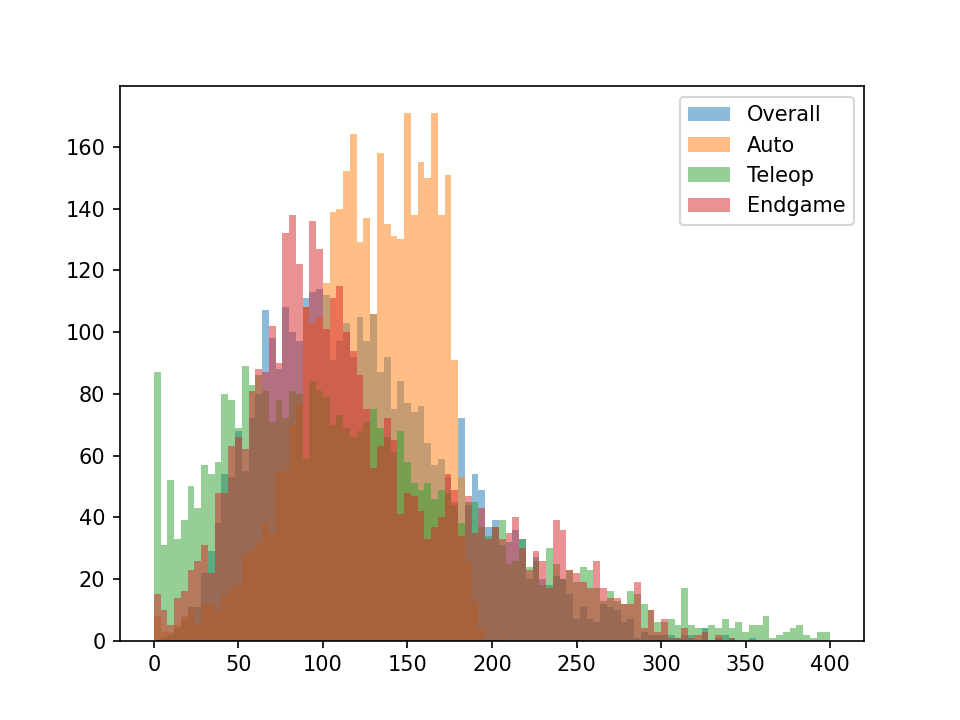

2020
[171.49, 260.36, 274.21, 61.05, 191.94, 183.47, 206.28, 142.59, 109.42, 117.3]
[1598.0, 1716.0, 1802.0, 1508.0, 1733.0, 1735.0, 1697.0, 1625.0, 1563.0, 1596.0]

109.95078787878774
118.39416666666679
97.68001010101028
116.5724898989899
1531.940404040404


<IPython.core.display.Javascript object>


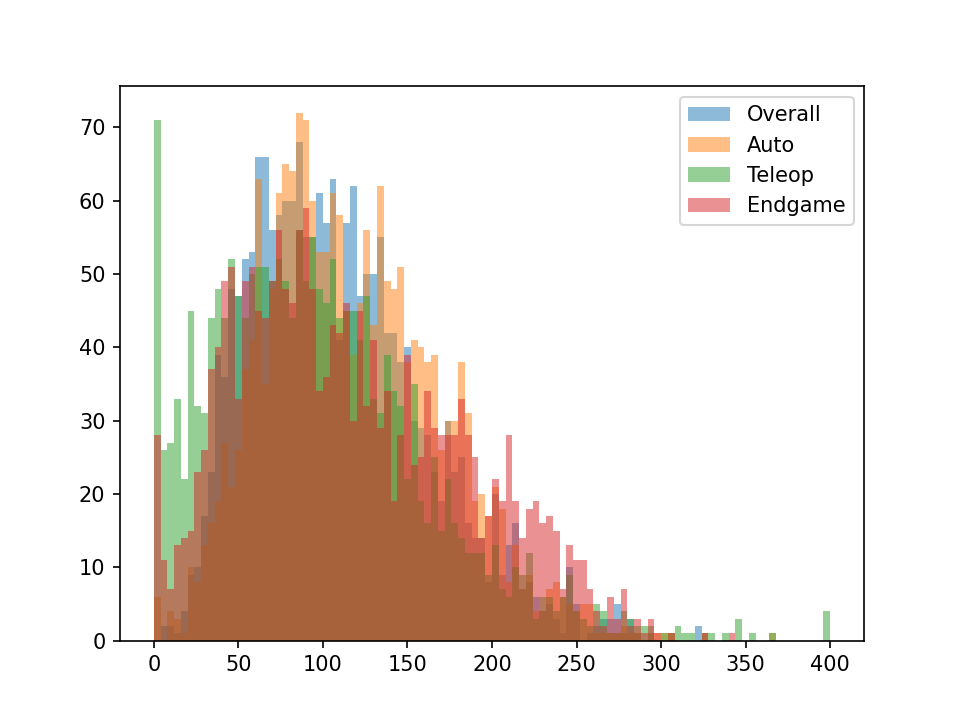

In [15]:
for year in range(2016, 2021):
    new_data = list([x[-1] for x in all_elos[year].values()])
    auto_data = list([x[-1] for x in auto_elos[year].values()])
    teleop_data = list([x[-1] for x in teleop_elos[year].values()])
    endgame_data = list([x[-1] for x in endgame_elos[year].values()])
    old_data = [t.elo_end for _, t in year_teams_dict[year].iterrows()]

    print(year)
    print(new_data[:10])
    print(old_data[:10])
    print()
    
    print(sum(new_data) / len(new_data))
    print(sum(auto_data) / len(auto_data))
    print(sum(teleop_data) / len(teleop_data))
    print(sum(endgame_data) / len(endgame_data))
    print(sum(old_data) / len(old_data))
    
    fig, ax = plt.subplots()
    x_range = (0, 400)
    ax.hist(new_data, bins=100, alpha=0.5, range=x_range, label="Overall")
    ax.hist(auto_data, bins=100, alpha=0.5, range=x_range, label="Auto")
    ax.hist(teleop_data, bins=100, alpha=0.5, range=x_range, label="Teleop")
    ax.hist(endgame_data, bins=100, alpha=0.5, range=x_range, label="Endgame")
    # ax.hist(old_data, bins=100, alpha=0.5, range=(1300, 2000), label="Old")
    ax.legend()
    fig.show()

<IPython.core.display.Javascript object>


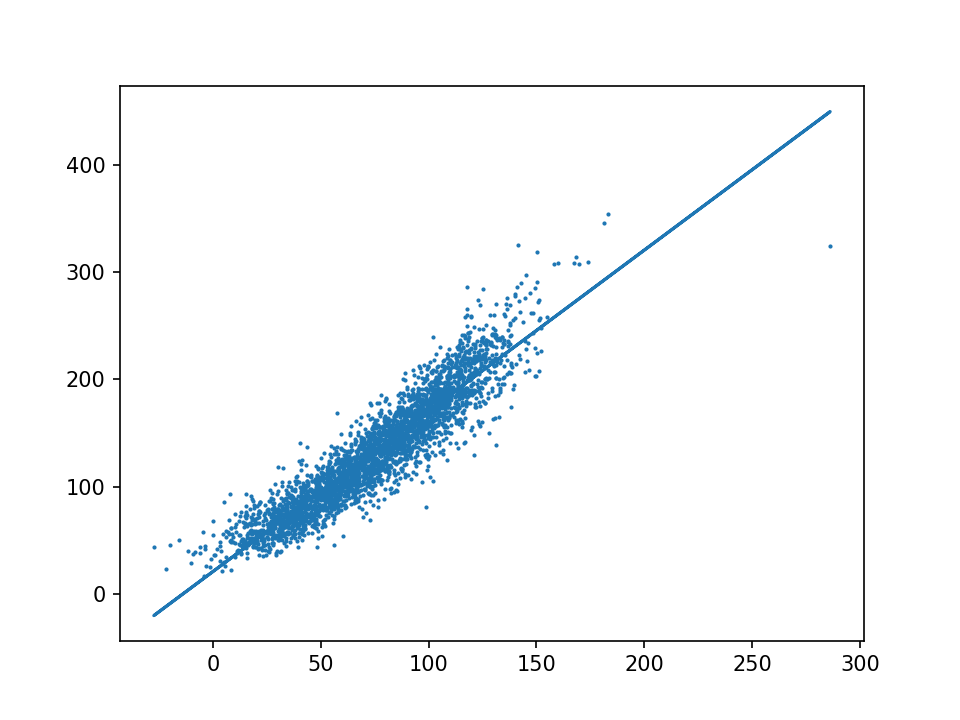

<IPython.core.display.Javascript object>


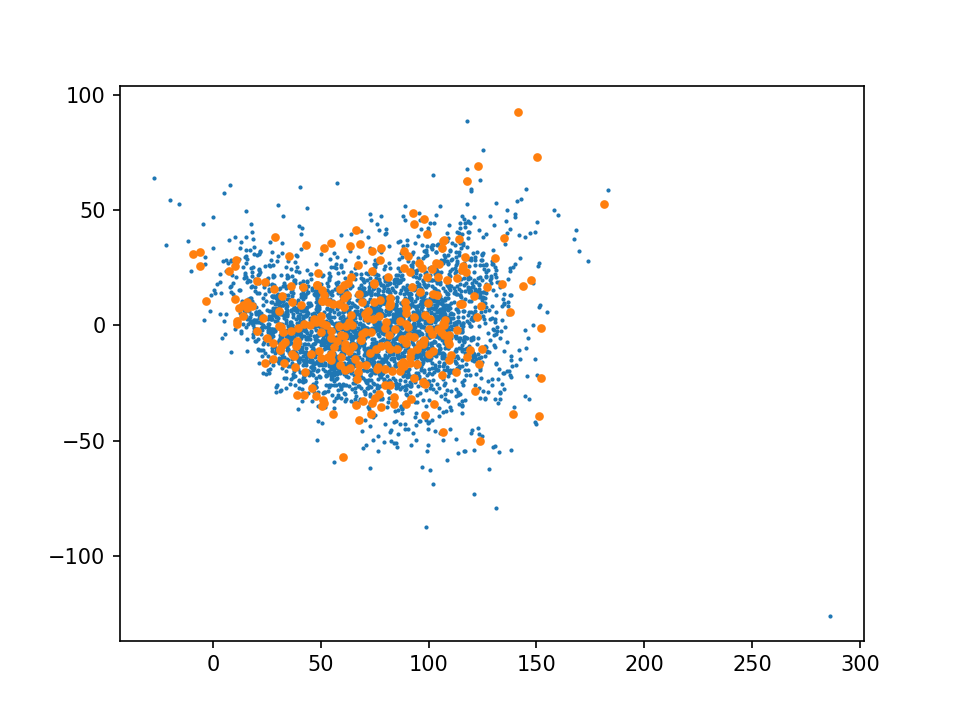

1.5019585318278703


In [16]:
year = 2017
region = "CA"

temp_elos = {t.team: t.opr for _, t in year_teams_dict[year].iterrows()}
old_data, new_data = [], []
for team, rv in all_elos[year].items():
    old_data.append(temp_elos[team])
    new_data.append(rv[-1])
    
region_elos = {t.team: t.opr for _, t in year_teams_dict[year].iterrows() if t.state == region}
old_region_data, new_region_data = [], []
for team, rv in all_elos[year].items():
    if team in region_elos:
        old_region_data.append(region_elos[team])
        new_region_data.append(rv[-1])
    
old_data = np.array(old_data)
new_data = np.array(new_data)

old_region_data = np.array(old_region_data)
new_region_data = np.array(new_region_data)


fig, ax = plt.subplots()
ax.scatter(old_data, new_data, s=1)

m, b = np.polyfit(old_data, new_data, 1)

ax.plot(old_data, m * old_data + b)

fig.show()

fig, ax = plt.subplots()
ax.scatter(old_data, new_data - (m * old_data + b), s=1)
ax.scatter(old_region_data, new_region_data - (m * old_region_data + b), s=10)
fig.show()

print(np.mean(new_region_data - (m * old_region_data + b)))